# coronasaurus
This repository is coronasaurus's entry to NERC's [COVID-19 Hackathon 2: Recovery](https://digitalenvironment.org/home/covid-19-digital-sprint-hackathons/covid-19-hackathon-2-recovery/).

In [1]:
from notebook import notebookapp
from IPython.display import display, Markdown

display(Markdown("### Notebook"))

servers = list(notebookapp.list_running_servers())
if servers[0]['hostname'] == 'localhost':
    
    display(Markdown(
        """You're currently viewing this notebook locally. You could also run it online in an interactive binder by clicking below:\\
        [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aricooperdavis/coronasaurus_NERCHackathonTwo_Multivariate/master?urlpath=%2Flab%2Fcoronasaurus.ipynb)"""))
else:
    display(Markdown(
        """You're currently viewing this notebook remotely.
        You can also [download this notebook](https://github.com/aricooperdavis/coronasaurus_NERCHackathonTwo_Multivariate/blob/master/coronasaurus.ipynb) and run it locally in Jupyter."""))

### Notebook

You're currently viewing this notebook locally. You could also run it online in an interactive binder by clicking below:\
        [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aricooperdavis/coronasaurus_NERCHackathonTwo_Multivariate/master?urlpath=%2Flab%2Fcoronasaurus.ipynb)

## Introduction
The unprecedented global response to the COVID-19 pandemic has resulted in huge population behavioural changes; from the cessation of travel to a transition to remote working. We don't often see changes of this magnitude, which offers researchers the unique opportunity to evaluate the impact of lockdown measures.

One particular area of interest is the impact on greenhouse gas emissions. As a signatory of the Paris Agreement the UK has a responsibility to limit the global average temperature rise to below 2&deg;C, but this is an ambitious task! Can we use data from this event to evaluate the sort of changes that might need to be made to meet these climate goals?

### Targets
First off, let's have a look at the targets that the UK are trying to meet. First of all we've got the Paris Agreement. The signatories of the Paris Agreement agree to:
- Keep global temperature rise to *well below* 2&deg;C [<sup>[1]</sup>](https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement).

In order to meet this the EU and its member states agree a Nationally Determined Contribution to:
- Reduce the EU's CO<sub>2</sub>e emissions to 40% below 1990 levels by 2030 [<sup>[2]</sup>](https://www4.unfccc.int/sites/ndcstaging/PublishedDocuments/United%20Kingdom%20of%20Great%20Britain%20and%20Northern%20Ireland%20First/LV-03-06-EU%20INDC.pdf).

The UK has also set it's own targets in the form of "budgets" that it can emit in a given period [<sup>[3]</sup>](https://web.archive.org/web/20200430013424/https://www.theccc.org.uk/what-is-climate-change/reducing-carbon-emissions/carbon-budgets-and-targets/). In the form of targets these are approximately:

Year | Target (below 1990 levels)
:--- | ---:
2020 | 37%
2025 | 51%
2030 | 57%

And finally, in June 2019 the act was amended to add a net zero target by 2020 [<sup>[5]</sup>](https://www.legislation.gov.uk/uksi/2019/1056/contents/made). And we can visualise these targets and our current progress like this:

In [2]:
import pandas as pd
from bokeh.plotting import figure, output_notebook, show

# Load emissions data
emissions = pd.read_csv('./presentation/emissions.csv')

# output for slides
output_notebook()

p = figure(title="UK CO₂e Emissions & Targets", x_axis_label='Year', y_axis_label='Emissions MTCO₂e/Year')
p.line(emissions['Year'], emissions['Historical emissions, excl forestry'], legend_label='Historical emissions, excl forestry', line_width=2, line_color='crimson')
p.line(emissions['Year'], emissions['Current policy projections'], legend_label='Current policy projections', line_width=2, line_color='darkorchid')
p.circle(emissions['Year'], emissions['2020 Pledge'], legend_label='2020 pledge', size=8, fill_color='white', line_color='darkcyan')
p.circle(emissions['Year'], emissions['2030 Pledge'], legend_label='2030 pledge', size=8, fill_color='white', line_color='forestgreen')
p.circle(emissions['Year'], emissions['2050 Pledge'], legend_label='2050 pledge', size=8, fill_color='white', line_color='lime')

show(p)

Loading BokehJS ...

### Areas for Improvement
To best tackle the challenge of reducing our greenhouse gas emissions we need to identify where we're emitting them and how much potential we have at reduction in those regions. The following figure, adapted from [<sup>[6]<sup>](https://data.gov.uk/dataset/9568363e-57e5-4c33-9e00-31dc528fcc5a/final-uk-greenhouse-gas-emissions-national-statistics) illustrate which sectors are responsible for the greatest proportion of emissions:
    
![Bar graph](presentation/ghg_sector_targets.png)
    
As business emissions mainly consist of "Industrial combustion and electricity", and recent data from this sector is difficult to come by, we chose to focus mainly on Transportation, Energy Supply, and Residential sources.

## Transport
Poitr's work will go here.

## Energy
The next most significant sector is energy supply; how have lockdown measures changed the balance and timing of energy demand in the UK?

### National Grid
The National Grid Electricity System Operator (ESO) maintains detailed datasets of the [total demand on the electricity grid over time](https://demandforecast.nationalgrid.com/efs_demand_forecast/faces/DataExplorer). These demand figures detail the total demand over the whole grid, which will include some business use. You can see how we processed that data [here](/grid/Grid%20Demand.ipynb).

In [3]:
from grid import griddata
grid_data = griddata.GridData('./grid/combined.csv')
grid_data.plot_demand_bkh(collapse=False, color='cadetblue')

Loading BokehJS ...

Here we can see the available demand data. There is a small gap in the data during the initial lockdown period, and it looks like the resulting demand might be lower than previous years. To assess this properly we trained a Gaussian Process Regression model on the pre-lockdown data points and used it to predict what grid demand could be expected in the future. This is a fancy non-parametric, supervised learning algorithm, and you can play with this model, and try training it yourself [here](/grid/Grid%20Demand.ipynb).

In [4]:
grid_data.load_model_output('./grid/model_output.p')
grid_data.plot_model_bkh()

Loading BokehJS ...

It is clear that the post-lockdown demand is lower than our model expects; with none of the points above the mean and some outside of our lowest confidence intervals. This is more obvious when we plot the demand discrepancy (the measured demand over the forecasted demand).

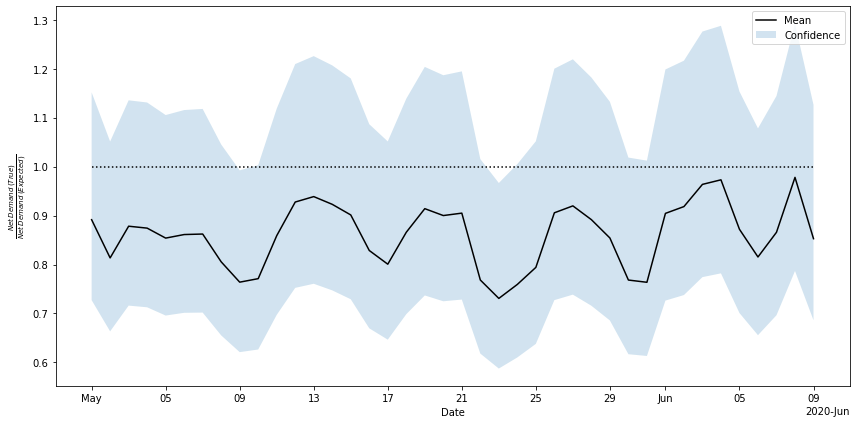

In [10]:
grid_data.plot_demand_discrepancy(figsize=(12,6), plot_confidence=True)

In [ ]:
grid_data.plot_demand_discrepancy_bkh()

### Octopus energy
The utility company, Octopus, have been doing their own data-analysis on energy demand data from their smart meters, and kindly made their results available [on their website](https://tech.octopus.energy/data-discourse/2020-social-distancing/index.html). This is particularly interesting as it allows us to explore Residential Energy use.

We pulled the raw data from the graphs that they provided so that we could perform our own analysis on it. If you're playing along at home then you can see how we did that [here](/grid/octopus/octopus-plotly-extraction.ipynb).

In [6]:
from grid import octopusdata
octopus = octopusdata.OctopusData(data_file='./grid/octopus/octopus.csv', weather_file='./grid/octopus/UK_weather.csv')

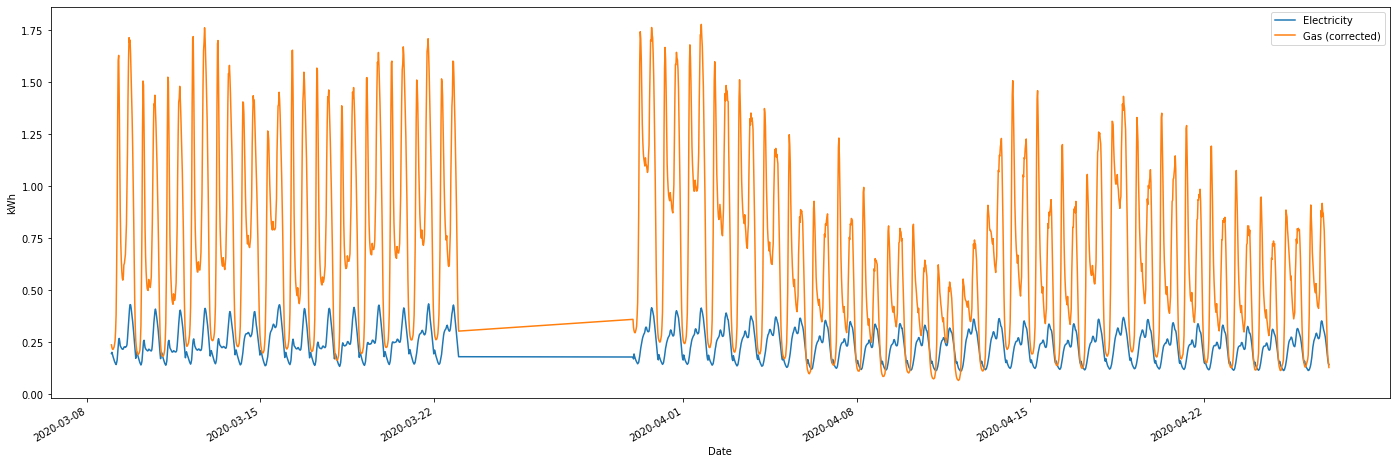

In [7]:
octopus.plot_timeline()

The plot above shows what we managed to get; 6 weeks of half-hourly electricity and gas (seasonally corrected) usage averaged over 115,000 smart meters - with one missing week.

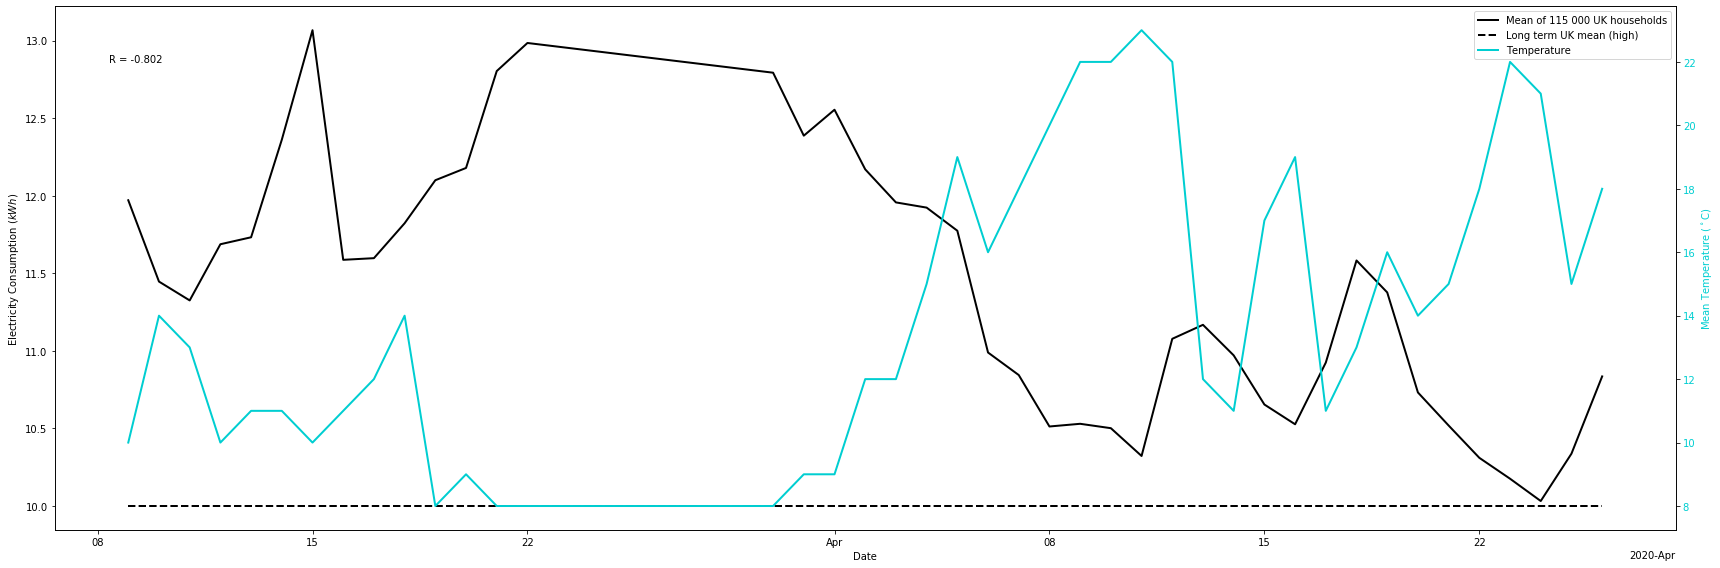

In [8]:
octopus.plot_daily_electricity(figsize=(24,8), plot_temperature=True, colors=['k', 'darkturquoise'])

Whilst electricity demand is well above the long term UK mean throughout lockdown, there is a downward trend, suggesting that population behaviour adjusts over pronounced periods of working from home in a way that reduces overall electricity demand. However, we need to make sure that this decrease can't be explained by any other variables, which is why we've included the mean UK temperature for that period. There does seem to be a strong relationship between temperature and demand.

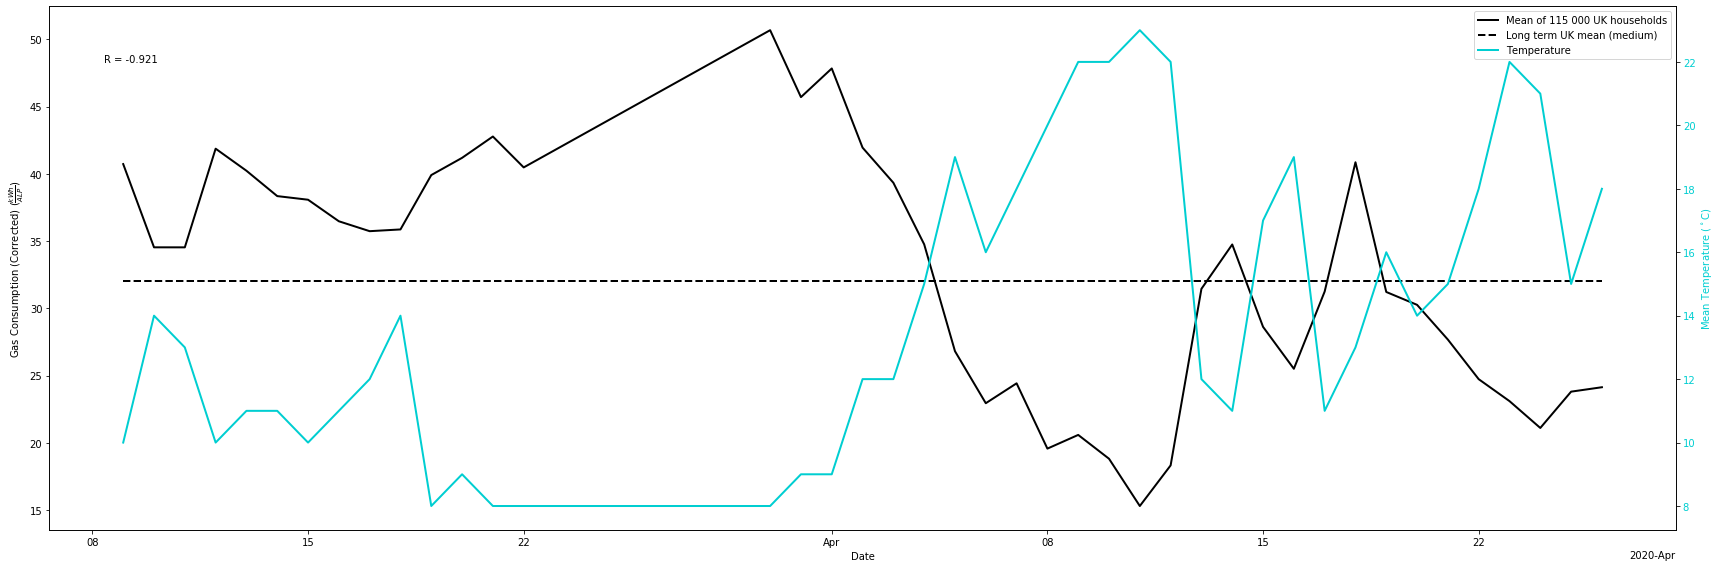

In [9]:
octopus.plot_daily_gas(figsize=(24,8), plot_temperature=True, colors=['k', 'darkturquoise'])

This relationship is even more pronounced for gas usage, which isn't too surprising because of the prevelance of gas boilers for UK central heating systems.